# Experimental Results on the COVID19 data

## Import of the libraries and our package

In [2]:
import numpy as np
import numpy.linalg as npl
import numpy.random as npr

import scipy as sp
import scipy.linalg as spl
import scipy.stats as sps
import time
import pandas as pd


import matplotlib.pyplot as plt

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2


from covid import * #allows us to use our functions directly

## Test of the PD3S algorrithm to compute the MAP 

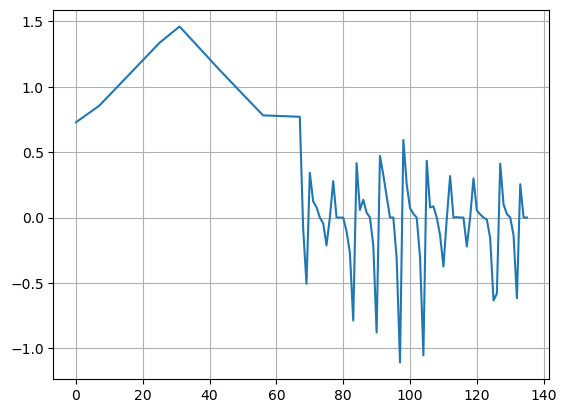

In [2]:
plt.figure()
Z,phi=load_data('stuff/Z.csv', 'stuff/Phi.csv')
MAP= PD3S(Z,phi)
plt.plot(MAP)
plt.grid()
plt.show()

## Test of the Randow walk method on the data

In [21]:
lambda_R

172850.9830994205

In [22]:
Z,phi=load_data('stuff/Z.csv', 'stuff/Phi.csv')
lambda_O = 0.05
lambda_R = 3.5*np.std(Z)
T=len(Z)
#theta_tab, accepts, gammas,end_burn_in=MHSubdiff(T,Z,phi,lambda_R,lambda_O,niter=5e5, method = "source")
theta_tab, accepts, gammas,end_burn_in=MHRW(T,Z,phi,lambda_R,lambda_O,niter=2.5e6,method="image")

[[ 4.00000000e+00 -4.21884749e-15  2.66453526e-15 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 8.00000000e+00  4.00000000e+00  5.32907052e-15 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 1.20000000e+01  8.00000000e+00  4.00000000e+00 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.82354465e+01
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   4.07619345e+01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  4.31394088e+01]]
49999
99999
149999
199999
249999
299999
349999
399999
449999
499999
549999
End of the burn-in
599999
649999
699999
749999
799999
849999
899999
949999
999999
1049999
1099999
1149999
1199999
1249999
1299999
1349999
1399999
1449999
1499999
1549999
1599999
1649999
1699999
1749999
1799999
1849999
1899999
1949999
1999999
2049999
2099999
2149999
2199999
2249999
2299999

In [23]:
#Saving simulation results
np.savez("resultats2MILimage.npz", theta_tab=theta_tab, accepts=accepts, gammas=gammas)

In [21]:
#loading results
data_source= np.load("resultats2MILsource.npz")
theta_tab_source = data_source["theta_tab"]
accepts_source=data_source["accepts"]
gammas_source=data_source["gammas"]

In [7]:
data_image= np.load("resultats2MILimage.npz")
theta_tab_image = data_image["theta_tab"]
accepts_image=data_image["accepts"]
gammas_image=data_image["gammas"]

In [8]:
data_subdiff_image= np.load("resultats2MILsubdiff_image.npz")
theta_tab_subdiff_image = data_subdiff_image["theta_tab"]
accepts_subdiff_image=data_subdiff_image["accepts"]
gammas_subdiff_image=data_subdiff_image["gammas"]

In [9]:
data_subdiff_source= np.load("resultats2MILsubdiff_source.npz")
theta_tab_subdiff_source = data_subdiff_source["theta_tab"]
accepts_subdiff_source=data_subdiff_source["accepts"]
gammas_subdiff_source=data_subdiff_source["gammas"]

In [10]:
data_prox_image= np.load("resultats2MILprox_image.npz")
theta_tab_prox_image = data_prox_image["theta_tab"]
accepts_prox_image=data_prox_image["accepts"]
gammas_prox_image=data_prox_image["gammas"]

In [12]:
lambda_O = 0.05
lambda_R = 3.5*np.std(Z)
T=len(Z)
a = 0.73597
b = 0.73227
barsh=Buildbarsh(T,a,b)
D=BuildD(T)
C = np.diag(phi)
MAPR,MAPO=np.split(MAP,2)

logpi_max=log_pi(MAP, phi,Z, lambda_R, D, barsh, lambda_O,phi,C)



In [24]:
R_image,O_image=np.split(theta_tab_image,2,axis=1)
log_pi_image = np.apply_along_axis(lambda theta: log_pi(theta, phi, Z, lambda_R, D, barsh, lambda_O, phi, C),axis=1,arr=theta_tab_image)

In [25]:
R_source,O_source=np.split(theta_tab_source,2,axis=1)
log_pi_source = np.apply_along_axis(lambda theta: log_pi(theta, phi, Z, lambda_R, D, barsh, lambda_O, phi, C),axis=1,arr=theta_tab_source)

In [15]:
R_subdiff_source,O_subdiff_source=np.split(theta_tab_subdiff_source,2,axis=1)
log_pi_subdiff_source = np.apply_along_axis(lambda theta: log_pi(theta, phi, Z, lambda_R, D, barsh, lambda_O, phi, C),axis=1,arr=theta_tab_subdiff_source)

In [16]:
R_subdiff_image,O_subdiff_image=np.split(theta_tab_subdiff_image,2,axis=1)
log_pi_subdiff_image = np.apply_along_axis(lambda theta: log_pi(theta, phi, Z, lambda_R, D, barsh, lambda_O, phi, C),axis=1,arr=theta_tab_subdiff_image)

In [17]:
R_prox_image,O_prox_image=np.split(theta_tab_prox_image,2,axis=1)
log_pi_prox_image = np.apply_along_axis(lambda theta: log_pi(theta, phi, Z, lambda_R, D, barsh, lambda_O, phi, C),axis=1,arr=theta_tab_prox_image)

<>:10: SyntaxWarning: invalid escape sequence '\ '
<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\ '
<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
C:\Users\sliss\AppData\Local\Temp\ipykernel_6060\1081861284.py:10: SyntaxWarning: invalid escape sequence '\ '
  axes[0].set_title("Relative distance to the maximum of the $ln \ \pi$ distribution")
C:\Users\sliss\AppData\Local\Temp\ipykernel_6060\1081861284.py:21: SyntaxWarning: invalid escape sequence '\p'
  axes[1].set_title("Relative distance to the MAP of $\pi$ for the R component")
C:\Users\sliss\AppData\Local\Temp\ipykernel_6060\1081861284.py:32: SyntaxWarning: invalid escape sequence '\p'
  axes[2].set_title("Relative distance to the MAP of $\pi$ for the O component")
C:\Users\sliss\AppData\Local\Temp\ipykernel_6060\1081861284.py:63: UserWarning: Creating legend with loc="best" 

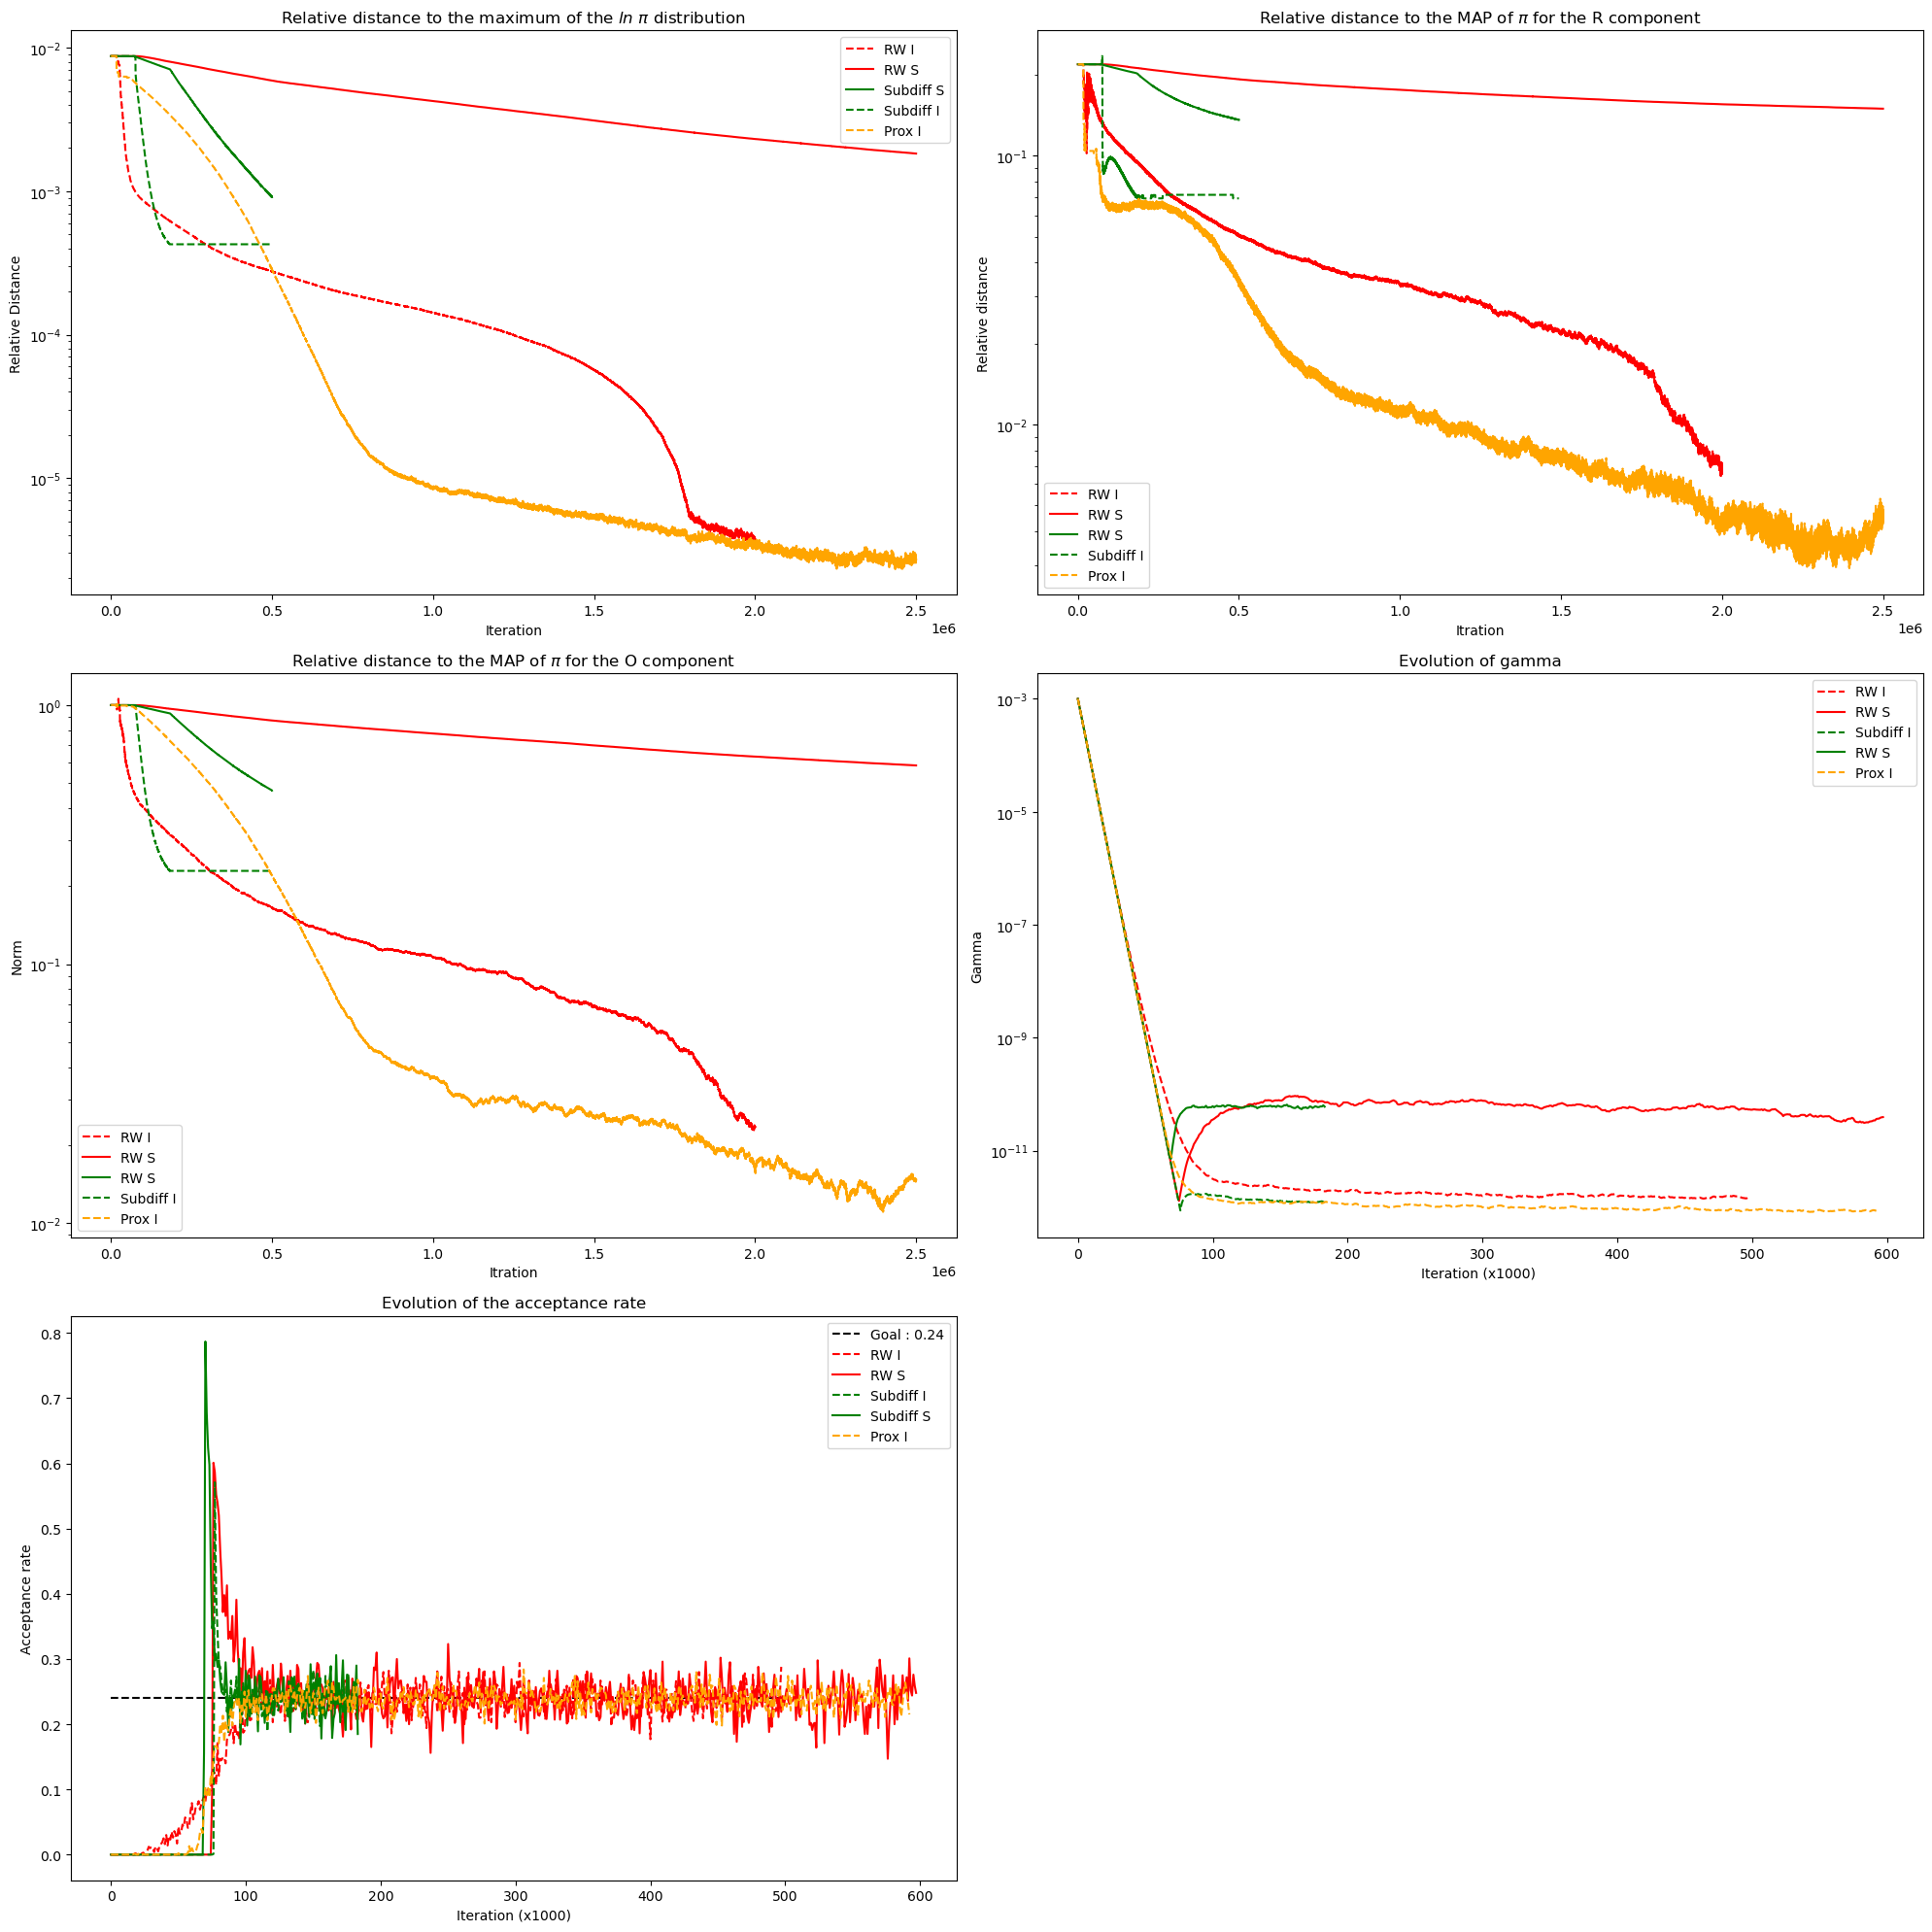

In [26]:

fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes = axes.flatten()  # plus simple pour indexer

# 1. Distance au max de la densité log_pi globale
axes[0].semilogy(np.abs(log_pi_image - logpi_max)/logpi_max,color="red",linestyle="--",label="RW I")
axes[0].semilogy(np.abs(log_pi_source - logpi_max)/logpi_max,color="red",label="RW S")
axes[0].semilogy(np.abs(log_pi_subdiff_source - logpi_max)/logpi_max,color="green",label="Subdiff S")
axes[0].semilogy(np.abs(log_pi_subdiff_image - logpi_max)/logpi_max,color="green",linestyle="--",label="Subdiff I")
axes[0].semilogy(np.abs(log_pi_prox_image - logpi_max)/logpi_max,color="orange",linestyle="--",label="Prox I")
axes[0].set_title("Relative distance to the maximum of the $ln \ \pi$ distribution")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Relative Distance")
axes[0].legend()

# 2. Distance relative à l'argmax de la densité log_pi pour R
axes[1].semilogy(np.linalg.norm(R_image - MAPR, axis=1)/np.linalg.norm(MAPR),color="red",linestyle = "--",label="RW I")
axes[1].semilogy(np.linalg.norm(R_source - MAPR, axis=1)/np.linalg.norm(MAPR),color="red",label="RW S")
axes[1].semilogy(np.linalg.norm(R_subdiff_source - MAPR, axis=1)/np.linalg.norm(MAPR),color="green",label="RW S")
axes[1].semilogy(np.linalg.norm(R_subdiff_image - MAPR, axis=1)/np.linalg.norm(MAPR),color="green",linestyle = "--",label="Subdiff I")
axes[1].semilogy(np.linalg.norm(R_prox_image - MAPR, axis=1)/np.linalg.norm(MAPR),color="orange",linestyle = "--",label="Prox I")
axes[1].set_title("Relative distance to the MAP of $\pi$ for the R component")
axes[1].set_xlabel("Itration")
axes[1].set_ylabel("Relative distance")
axes[1].legend()

# 2. Distance à l'argmax de la densité log_pi pour O
axes[2].semilogy(np.linalg.norm(O_image - MAPO, axis=1)/np.linalg.norm(MAPO),color="red",linestyle = "--",label="RW I")
axes[2].semilogy(np.linalg.norm(O_source - MAPO, axis=1)/np.linalg.norm(MAPO),color="red",label="RW S")
axes[2].semilogy(np.linalg.norm(O_subdiff_source - MAPO, axis=1)/np.linalg.norm(MAPO),color="green",label="RW S")
axes[2].semilogy(np.linalg.norm(O_subdiff_image - MAPO, axis=1)/np.linalg.norm(MAPO),color="green",linestyle = "--",label="Subdiff I")
axes[2].semilogy(np.linalg.norm(O_prox_image - MAPO, axis=1)/np.linalg.norm(MAPO),color="orange",linestyle = "--",label="Prox I")
axes[2].set_title("Relative distance to the MAP of $\pi$ for the O component")
axes[2].set_xlabel("Itration")
axes[2].set_ylabel("Norm")
axes[2].legend()

# 4. Évolution de gamma
axes[3].semilogy(gammas_image,color="red",linestyle = "--",label="RW I")
axes[3].semilogy(gammas_source,color="red",label="RW S")
axes[3].semilogy(gammas_subdiff_image,color="green",linestyle = "--",label="Subdiff I")
axes[3].semilogy(gammas_subdiff_source,color="green",label="RW S")
axes[3].semilogy(gammas_prox_image,color="orange",linestyle = "--",label="Prox I")
axes[3].set_title("Evolution of gamma")
axes[3].set_xlabel("Iteration (x1000) ")
axes[3].set_ylabel("Gamma")
axes[3].legend()

# 5. Évolution du taux d’acceptation
axes[4].hlines(0.24, xmin=0, xmax=len(accepts_image), linestyle='--', color='black', label="Goal : 0.24")
axes[4].plot(accepts_image,color="red",linestyle = "--",label="RW I")
axes[4].plot(accepts_source,color="red",label="RW S")
axes[4].plot(accepts_subdiff_image,color="green",linestyle = "--",label="Subdiff I")
axes[4].plot(accepts_subdiff_source,color="green",label="Subdiff S")
axes[4].plot(accepts_prox_image,color="orange",linestyle = "--",label="Prox I")
axes[4].set_title("Evolution of the acceptance rate")
axes[4].set_xlabel("Iteration (x1000)")
axes[4].set_ylabel("Acceptance rate")
axes[4].legend()

# Supprimer le dernier subplot vide (le 6e)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()


## Estimation du taux de reproduction

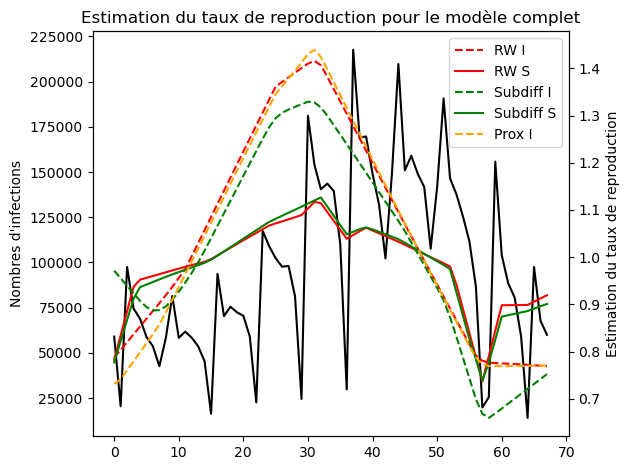

In [28]:
#Take the median of the second half of the simulations as estimator
R_hat_image=np.quantile(R_image[int(len(R_image)/2):,:],0.5,axis=0)
R_hat_source=np.quantile(R_source[int(len(R_source)/2):,:],0.5,axis=0)
R_hat_subdiff_image=np.quantile(R_subdiff_image[int(len(R_subdiff_image)/2):,:],0.5,axis=0)
R_hat_subdiff_source=np.quantile(R_subdiff_source[int(len(R_subdiff_source)/2):,:],0.5,axis=0)
R_hat_prox_image=np.quantile(R_prox_image[int(len(R_prox_image)/2):,:],0.5,axis=0)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  # deuxième axe y indépendant mais même axe x

ax1.plot(Z, color='black',linestyle="-")
ax2.plot(R_hat_image, color="red",linestyle="--",label="RW I")
ax2.plot(R_hat_source, color="red",label="RW S")
ax2.plot(R_hat_subdiff_image, color="green",linestyle="--",label="Subdiff I")
ax2.plot(R_hat_subdiff_source, color="green",label="Subdiff S")
ax2.plot(R_hat_prox_image, color="orange",linestyle="--",label="Prox I")

ax1.set_ylabel('Nombres d\'infections', color='black')
ax2.set_ylabel('Estimation du taux de reproduction', color='black')
plt.title("Estimation du taux de reproduction pour le modèle complet")
plt.legend()

fig.tight_layout()
plt.show()

## Modèle sans pénalité et sans correction $O$

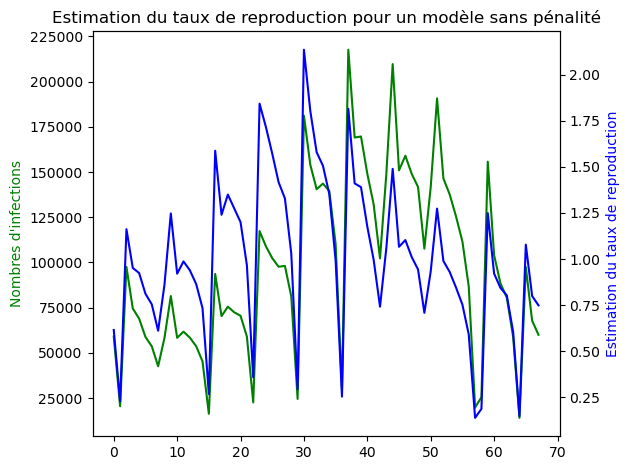

In [14]:
Z,phi=load_data('stuff/Z.csv', 'stuff/Phi.csv')
lambda_O = 0
lambda_R = 0
T=len(Z)
R_hat=Z/phi

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  # deuxième axe y indépendant mais même axe x

ax1.plot(Z, 'g-')
ax2.plot(R_hat, 'b-')

ax1.set_ylabel('Nombres d\'infections', color='g')
ax2.set_ylabel('Estimation du taux de reproduction', color='b')
plt.title("Estimation du taux de reproduction pour un modèle sans pénalité")

fig.tight_layout()
plt.show()

## Test normalisation

In [12]:
cible=np.array([2,1,3,2,1])
res=np.array([2.01,0.9,3.1,6,1.1])
print((res-cible)/cible)
mean_relative=np.linalg.norm((res-cible)/cible)
classic_norm=np.linalg.norm(res-cible)/np.linalg.norm(cible)
print(f"Norm of relative distance per component : {mean_relative}")
print(f"Classic normalisation : {classic_norm}")

[ 0.005      -0.1         0.03333333  2.          0.1       ]
Norm of relative distance per component : 2.0052770659215926
Classic normalisation : 0.9185257065995542
